# Bachelor-Notebook

### Data sources:
- [Games_of_all_time.csv](https://www.kaggle.com/datasets/xcherry/games-of-all-time-from-metacritic)
- [metacritic_games.csv](https://www.kaggle.com/datasets/skateddu/metacritic-all-time-games-stats)
- [Video_Games_Sales_as_at_22_Dec...](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

##### Note: 


### "Text"

In [1]:
#Initialising the needed libaries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

Code der Stata in Phython "aktiviert" 
von: https://www.stata.com/python/pystata/install.html 

In [2]:
import sys
sys.path.append('C:/Program Files/Stata17/utilities')
from pystata import config
config.init('mp')


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user 4-core network, expiring 29 Oct 2023
Serial number: 501709301768
  Licensed to: Uni Hamburg
               Universität Hamburg

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


In [3]:
%%stata
help tab



Tables of frequencies
---------------------

    See

        tabulate oneway       for one-way tables of frequencies

        tabulate twoway       for two-way tables of frequencies

    and see

        tabulate, summarize() for one- and two-way tables of summary
                                statistics


"Text"

In [4]:
#Data from the Main-Dataset
metacrit_data = pd.read_csv(r"data\games_of_all_time.csv")

In [5]:
#Data from the second Dataset with release Dates
releasedata = pd.read_csv(r"data\metacritic_games.csv")

In [224]:
#Setting the option that all columns are shown.
pd.set_option('display.max_columns', 100)

In [223]:
metacrit_data

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,publisher,players,release_date,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative,niche_width
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",/game/nintendo-64/the-legend-of-zelda-ocarina-...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,['Action Adventure','Fantasy'],0,0,0,0,0,0,0,0,Nintendo,1 Player,"Nov 23, 1998",/game/nintendo-64/the-legend-of-zelda-ocarina-...,22.0,0.0,0.0,918.0,42.0,37.0,2
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,/game/wii/super-mario-galaxy,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"Nov 12, 2007",/game/wii/super-mario-galaxy,73.0,0.0,0.0,608.0,46.0,26.0,3
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",/game/wii/super-mario-galaxy-2,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"May 23, 2010",/game/wii/super-mario-galaxy-2,87.0,0.0,0.0,294.0,16.0,15.0,3
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,/game/gamecube/metroid-prime,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,['Action','Shooter','First-Person','Sci-Fi'],0,0,0,0,0,0,Nintendo,1 Player,"Nov 17, 2002",/game/gamecube/metroid-prime,70.0,0.0,0.0,267.0,20.0,9.0,4
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,/game/switch/super-mario-odyssey,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"Oct 27, 2017",/game/switch/super-mario-odyssey,113.0,0.0,0.0,1068.0,65.0,38.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,['Action','Shooter','Third-Person','Modern'],0,0,0,0,0,0,Namco,1 Player,"Oct 28, 2003",/game/xbox/killswitch,16.0,10.0,0.0,5.0,1.0,1.0,4
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,['Driving','Racing','Arcade','Automobile'],0,0,0,0,0,0,Deep Silver,No Online Multiplayer,"Nov 30, 2010",/game/pc/naild,5.0,8.0,0.0,4.0,2.0,1.0,4
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,/game/xbox-one/ooo-ascension,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,['Action','General','Arcade'],0,0,0,0,0,0,0,Extra Mile Studios,Online Multiplayer,"May 25, 2018",/game/xbox-one/ooo-ascension,4.0,4.0,0.0,2.0,1.0,0.0,3
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",0,E,['Miscellaneous','General'],0,0,0,0,0,0,0,0,THQ,0,"Nov 14, 2010",/game/wii/udraw-studio,2.0,7.0,0.0,1.0,0.0,0.0,2


### Beschreibungen: 

Gibt eine grobe Übersicht über das jeweilige Datenset:

Main-Dataset:

In [8]:
metacrit_data.columns

Index(['game_name', 'meta_score', 'user_score', 'platform', 'description',
       'url', 'developer', 'genre', 'type', 'rating'],
      dtype='object')

In [9]:
metacrit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    8831 non-null   object 
 1   meta_score   8831 non-null   float64
 2   user_score   8831 non-null   float64
 3   platform     8831 non-null   object 
 4   description  8831 non-null   object 
 5   url          8831 non-null   object 
 6   developer    8821 non-null   object 
 7   genre        8827 non-null   object 
 8   type         6727 non-null   object 
 9   rating       7691 non-null   object 
dtypes: float64(2), object(8)
memory usage: 690.0+ KB


In [10]:
metacrit_data.shape

(8831, 10)

In [11]:
metacrit_data.describe()

,meta_score,user_score
count,8831.000000,8831.000000
mean,70.876621,69.903918
std,12.181944,13.161456
min,11.000000,2.000000
25%,63.000000,63.000000
50%,73.000000,72.800000
75%,80.000000,79.000000
max,99.000000,98.000000


In [12]:
releasedata.publisher.unique()

array(['Virgin Interactive', 'LucasArts', 'SCEA', ..., 'Deeli network',
       'Undercoders', 'Snap Finger Click Ltd'], dtype=object)

In [13]:
releasedata.developer.unique()

array(['Westwood Studios', 'LucasArts', 'Tamsoft', ..., 'Deeli network',
       'Undercoders', 'Snap Finger Click Ltd'], dtype=object)

In [14]:
metacrit_data.developer.unique()

array(['Nintendo', 'Nintendo EAD Tokyo ', 'Retro Studios', ...,
       'PuzzleKings', 'Kiloo', 'Kenny Creanor'], dtype=object)

Second-Dataset:

In [15]:
releasedata.columns

Index(['name', 'platform', 'developer', 'publisher', 'genre(s)', 'players',
       'rating', 'attribute', 'release_date', 'link', 'critic_positive',
       'critic_neutral', 'critic_negative', 'metascore', 'user_positive',
       'user_neutral', 'user_negative', 'user_score'],
      dtype='object')

In [16]:
releasedata.describe()

,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative
count,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000
mean,10.807463,7.237391,1.529331,68.826902,16.880472,4.607580,6.389874
std,14.997891,7.239200,3.182006,13.248435,71.851614,16.328698,51.877636
min,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,61.000000,1.000000,0.000000,0.000000
50%,5.000000,5.000000,0.000000,71.000000,3.000000,1.000000,1.000000
75%,14.000000,10.000000,2.000000,78.000000,10.000000,3.000000,3.000000
max,118.000000,60.000000,51.000000,99.000000,3029.000000,507.000000,3001.000000


In [17]:
releasedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20422 entries, 0 to 20421
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             20422 non-null  object
 1   platform         20422 non-null  object
 2   developer        20385 non-null  object
 3   publisher        20416 non-null  object
 4   genre(s)         20422 non-null  object
 5   players          13193 non-null  object
 6   rating           18131 non-null  object
 7   attribute        324 non-null    object
 8   release_date     20422 non-null  object
 9   link             20422 non-null  object
 10  critic_positive  20422 non-null  int64 
 11  critic_neutral   20422 non-null  int64 
 12  critic_negative  20422 non-null  int64 
 13  metascore        20422 non-null  int64 
 14  user_positive    20422 non-null  int64 
 15  user_neutral     20422 non-null  int64 
 16  user_negative    20422 non-null  int64 
 17  user_score       20422 non-null

### Anpassung der Datensätze:

In [18]:
#Anpassung der URL Spalte an die Link Spalte des release_data - Datensatzes um ein mergen anhand der eizigartigen Internet-Adresse zu ermöglichen.
metacrit_data.url = metacrit_data.url.str.replace("https://www.metacritic.com/", "/")
metacrit_data

C:\Users\Marek\AppData\Local\Temp/ipykernel_8672/3687954423.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  metacrit_data.url = metacrit_data.url.str.replace("https://www.metacritic.com/", "/")


,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",/game/nintendo-64/the-legend-of-zelda-ocarina-...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,/game/wii/super-mario-galaxy,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",/game/wii/super-mario-galaxy-2,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,/game/gamecube/metroid-prime,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,/game/switch/super-mario-odyssey,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+
...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,/game/xbox-one/ooo-ascension,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",NaN,E


In [19]:
#Aufsplittung der Genre Spalte in einzelne Spalten für einfachere Übersicht:
metacrit_data[["genre1","genre2","genre3","genre4","genre5","genre6","genre7","genre8","genre9","genre10"]] = metacrit_data["genre"].str.split(",", expand=True) 
metacrit_data

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",/game/nintendo-64/the-legend-of-zelda-ocarina-...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,['Action Adventure','Fantasy'],None,None,None,None,None,None,None,None
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,/game/wii/super-mario-galaxy,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],None,None,None,None,None,None,None
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",/game/wii/super-mario-galaxy-2,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],None,None,None,None,None,None,None
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,/game/gamecube/metroid-prime,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,['Action','Shooter','First-Person','Sci-Fi'],None,None,None,None,None,None
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,/game/switch/super-mario-odyssey,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,['Action','Platformer','3D'],None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,['Action','Shooter','Third-Person','Modern'],None,None,None,None,None,None
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,['Driving','Racing','Arcade','Automobile'],None,None,None,None,None,None
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,/game/xbox-one/ooo-ascension,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,['Action','General','Arcade'],None,None,None,None,None,None,None
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",NaN,E,['Miscellaneous','General'],None,None,None,None,None,None,None,None


In [20]:
#Erstellung eines neuen Datensatzes mit den Spalten des releasedata-Datensatzes, welche mit dem Main-Datensatzes gemerged werden sollen
releasedata_mergeprep= releasedata[["publisher", "players", "release_date", "link", "critic_positive", "critic_neutral", "critic_negative", "user_positive", "user_neutral", "user_negative"] ].copy()
releasedata_mergeprep

,publisher,players,release_date,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative
0,Virgin Interactive,1-4,"Aug 31, 1995",/game/pc/command-conquer,5,0,0,47,0,1
1,LucasArts,NaN,"Apr 30, 1995",/game/pc/full-throttle,6,2,0,18,1,0
2,SCEA,1-2,"Sep 9, 1995",/game/playstation/battle-arena-toshinden,1,3,0,1,0,1
3,MicroProse,1 Player,"Feb 29, 1996",/game/pc/sid-meiers-civilization-ii,7,0,0,46,0,1
4,id Software,1-16,"Jun 22, 1996",/game/pc/quake,9,0,0,84,4,1
...,...,...,...,...,...,...,...,...,...,...
20417,Studio Wildcard,Online Multiplayer,"Nov 30, 2018",/game/switch/ark-survival-evolved,0,1,11,4,0,5
20418,NaN,Online Multiplayer,"May 10, 2018",/game/pc/wild-west-online,0,0,8,0,0,9
20419,Square Enix,No Online Multiplayer,"Nov 1, 2018",/game/playstation-4/the-quiet-man,1,0,20,5,0,19
20420,Snap Finger Click Ltd,No Online Multiplayer,"Jul 5, 2018",/game/switch/awkward,0,0,4,0,0,2


In [21]:
#Merge die Ausgewählten Spalten des releasedata-Datensatzes mit dem Main-Datensatz anhand der URL und LINK Spalte. 
metacrit_data = pd.merge(metacrit_data, releasedata_mergeprep, left_on=["url"], right_on=["link"], how="left").fillna(0)
metacrit_data

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,publisher,players,release_date,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",/game/nintendo-64/the-legend-of-zelda-ocarina-...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,['Action Adventure','Fantasy'],0,0,0,0,0,0,0,0,Nintendo,1 Player,"Nov 23, 1998",/game/nintendo-64/the-legend-of-zelda-ocarina-...,22.0,0.0,0.0,918.0,42.0,37.0
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,/game/wii/super-mario-galaxy,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"Nov 12, 2007",/game/wii/super-mario-galaxy,73.0,0.0,0.0,608.0,46.0,26.0
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",/game/wii/super-mario-galaxy-2,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"May 23, 2010",/game/wii/super-mario-galaxy-2,87.0,0.0,0.0,294.0,16.0,15.0
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,/game/gamecube/metroid-prime,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,['Action','Shooter','First-Person','Sci-Fi'],0,0,0,0,0,0,Nintendo,1 Player,"Nov 17, 2002",/game/gamecube/metroid-prime,70.0,0.0,0.0,267.0,20.0,9.0
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,/game/switch/super-mario-odyssey,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"Oct 27, 2017",/game/switch/super-mario-odyssey,113.0,0.0,0.0,1068.0,65.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,['Action','Shooter','Third-Person','Modern'],0,0,0,0,0,0,Namco,1 Player,"Oct 28, 2003",/game/xbox/killswitch,16.0,10.0,0.0,5.0,1.0,1.0
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,['Driving','Racing','Arcade','Automobile'],0,0,0,0,0,0,Deep Silver,No Online Multiplayer,"Nov 30, 2010",/game/pc/naild,5.0,8.0,0.0,4.0,2.0,1.0
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,/game/xbox-one/ooo-ascension,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,['Action','General','Arcade'],0,0,0,0,0,0,0,Extra Mile Studios,Online Multiplayer,"May 25, 2018",/game/xbox-one/ooo-ascension,4.0,4.0,0.0,2.0,1.0,0.0
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",0,E,['Miscellaneous','General'],0,0,0,0,0,0,0,0,THQ,0,"Nov 14, 2010",/game/wii/udraw-studio,2.0,7.0,0.0,1.0,0.0,0.0


### Niche Width Colum:

In [158]:
metacrit_data.dtypes

game_name           object
meta_score         float64
user_score         float64
platform            object
description         object
url                 object
developer           object
genre               object
type                object
rating              object
genre1              object
genre2              object
genre3              object
genre4              object
genre5              object
genre6              object
genre7              object
genre8              object
genre9              object
genre10             object
publisher           object
players             object
release_date        object
link                object
critic_positive    float64
critic_neutral     float64
critic_negative    float64
user_positive      float64
user_neutral       float64
user_negative      float64
niche_width          int64
dtype: object

In [68]:
# Setze die 0 in den genre Spalten als Fehlenden Wert
x=1
while x<11:
    print(("genre"+str(x))+ " vorher: " + str(metacrit_data[("genre"+str(x))].count()))
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(0, np.nan)
    print(("genre"+str(x))+ " nachher: " + str(metacrit_data[("genre"+str(x))].count()))
    x=x+1

genre1 vorher: 8827
genre1 nachher: 8827
genre2 vorher: 8826
genre2 nachher: 8826
genre3 vorher: 8831
genre3 nachher: 6441
genre4 vorher: 8831
genre4 nachher: 3579
genre5 vorher: 8831
genre5 nachher: 1606
genre6 vorher: 8831
genre6 nachher: 339
genre7 vorher: 8831
genre7 nachher: 96
genre8 vorher: 8831
genre8 nachher: 22
genre9 vorher: 8831
genre9 nachher: 3
genre10 vorher: 8831
genre10 nachher: 1


In [ ]:
#Erstellt neue Spalte mit dem Namen "niche_width"
metacrit_data["niche_width"]=0
metacrit_data

In [90]:
# Passt die Spalte "niche_width" mit der entsprechenden Anzahl an Genres die ein einzelnes Spiel aufweist an
x=1
while x<11:
    metacrit_data.loc[(metacrit_data[("genre"+str(x))].notnull()), "niche_width"]=x
    x=x+1
    print(metacrit_data["niche_width"].value_counts())


1    8827
0       4
Name: niche_width, dtype: int64
2    8826
0       4
1       1
Name: niche_width, dtype: int64
3    6441
2    2385
0       4
1       1
Name: niche_width, dtype: int64
4    3579
3    2862
2    2385
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1606
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     339
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      96
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      74
8      22
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      74
8      19
0       4
9       3
1       1
Name: niche_width, dtype: int64
3     2862
2     2385
4     1973
5     1267
6      243
7       74
8       19
0        4
9        2
1        1
10       1
Name: niche_width, dtype: int64


In [91]:
print(metacrit_data["niche_width"].value_counts())

3     2862
2     2385
4     1973
5     1267
6      243
7       74
8       19
0        4
9        2
1        1
10       1
Name: niche_width, dtype: int64


,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,publisher,players,release_date,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative,niche_width
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",/game/nintendo-64/the-legend-of-zelda-ocarina-...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,['Action Adventure','Fantasy'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,1 Player,"Nov 23, 1998",/game/nintendo-64/the-legend-of-zelda-ocarina-...,22.0,0.0,0.0,918.0,42.0,37.0,2
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,/game/wii/super-mario-galaxy,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,No Online Multiplayer,"Nov 12, 2007",/game/wii/super-mario-galaxy,73.0,0.0,0.0,608.0,46.0,26.0,3
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",/game/wii/super-mario-galaxy-2,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,No Online Multiplayer,"May 23, 2010",/game/wii/super-mario-galaxy-2,87.0,0.0,0.0,294.0,16.0,15.0,3
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,/game/gamecube/metroid-prime,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,['Action','Shooter','First-Person','Sci-Fi'],NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,1 Player,"Nov 17, 2002",/game/gamecube/metroid-prime,70.0,0.0,0.0,267.0,20.0,9.0,4
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,/game/switch/super-mario-odyssey,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,['Action','Platformer','3D'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,No Online Multiplayer,"Oct 27, 2017",/game/switch/super-mario-odyssey,113.0,0.0,0.0,1068.0,65.0,38.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,['Action','Shooter','Third-Person','Modern'],NaN,NaN,NaN,NaN,NaN,NaN,Namco,1 Player,"Oct 28, 2003",/game/xbox/killswitch,16.0,10.0,0.0,5.0,1.0,1.0,4
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,['Driving','Racing','Arcade','Automobile'],NaN,NaN,NaN,NaN,NaN,NaN,Deep Silver,No Online Multiplayer,"Nov 30, 2010",/game/pc/naild,5.0,8.0,0.0,4.0,2.0,1.0,4
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,/game/xbox-one/ooo-ascension,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,['Action','General','Arcade'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Extra Mile Studios,Online Multiplayer,"May 25, 2018",/game/xbox-one/ooo-ascension,4.0,4.0,0.0,2.0,1.0,0.0,3
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",0,E,['Miscellaneous','General'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,THQ,0,"Nov 14, 2010",/game/wii/udraw-studio,2.0,7.0,0.0,1.0,0.0,0.0,2


### Berechnungen:

##### Allgemeines:


In [22]:
#Maximum von Spalten

In [23]:
#Uniques Werte von Genre

In [24]:
#Boxplots

In [25]:
metacrit_data

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,publisher,players,release_date,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",/game/nintendo-64/the-legend-of-zelda-ocarina-...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,['Action Adventure','Fantasy'],0,0,0,0,0,0,0,0,Nintendo,1 Player,"Nov 23, 1998",/game/nintendo-64/the-legend-of-zelda-ocarina-...,22.0,0.0,0.0,918.0,42.0,37.0
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,/game/wii/super-mario-galaxy,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"Nov 12, 2007",/game/wii/super-mario-galaxy,73.0,0.0,0.0,608.0,46.0,26.0
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",/game/wii/super-mario-galaxy-2,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"May 23, 2010",/game/wii/super-mario-galaxy-2,87.0,0.0,0.0,294.0,16.0,15.0
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,/game/gamecube/metroid-prime,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,['Action','Shooter','First-Person','Sci-Fi'],0,0,0,0,0,0,Nintendo,1 Player,"Nov 17, 2002",/game/gamecube/metroid-prime,70.0,0.0,0.0,267.0,20.0,9.0
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,/game/switch/super-mario-odyssey,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"Oct 27, 2017",/game/switch/super-mario-odyssey,113.0,0.0,0.0,1068.0,65.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,['Action','Shooter','Third-Person','Modern'],0,0,0,0,0,0,Namco,1 Player,"Oct 28, 2003",/game/xbox/killswitch,16.0,10.0,0.0,5.0,1.0,1.0
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,['Driving','Racing','Arcade','Automobile'],0,0,0,0,0,0,Deep Silver,No Online Multiplayer,"Nov 30, 2010",/game/pc/naild,5.0,8.0,0.0,4.0,2.0,1.0
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,/game/xbox-one/ooo-ascension,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,['Action','General','Arcade'],0,0,0,0,0,0,0,Extra Mile Studios,Online Multiplayer,"May 25, 2018",/game/xbox-one/ooo-ascension,4.0,4.0,0.0,2.0,1.0,0.0
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",0,E,['Miscellaneous','General'],0,0,0,0,0,0,0,0,THQ,0,"Nov 14, 2010",/game/wii/udraw-studio,2.0,7.0,0.0,1.0,0.0,0.0


# Hypothese 1: 

### Vorbereitungen:

In [97]:
# Setze die Missing Values in den genre Spalten als 0 fest um Rechnungen zu ermöglichen
x=1
while x<11:
    print(("genre"+str(x))+ " vorher: " + str(metacrit_data[("genre"+str(x))].count()))
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(np.nan, 0)
    print(("genre"+str(x))+ " nachher: " + str(metacrit_data[("genre"+str(x))].count()))
    x=x+1

genre1 vorher: 8827
genre1 nachher: 8831
genre2 vorher: 8826
genre2 nachher: 8831
genre3 vorher: 6441
genre3 nachher: 8831
genre4 vorher: 3579
genre4 nachher: 8831
genre5 vorher: 1606
genre5 nachher: 8831
genre6 vorher: 339
genre6 nachher: 8831
genre7 vorher: 96
genre7 nachher: 8831
genre8 vorher: 22
genre8 nachher: 8831
genre9 vorher: 3
genre9 nachher: 8831
genre10 vorher: 1
genre10 nachher: 8831


In [98]:
#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def mean_gen_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0)]["meta_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0)]["meta_score"].median()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def mean_gen_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0)]["user_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0)]["user_score"].median()

#Überprüfung:
n=1
metacrit_data[(metacrit_data[("genre"+ str(n))] != 0)]["meta_score"].mean()   

#Manuell: Gibt den durchschnittlichen Meta Score für aller Spiele wieder, die ein zehn Genres haben
filt10=(metacrit_data["genre10"] != 0)
gen10=metacrit_data[filt10]
gen10["meta_score"].mean()

#Überprüfung ob Funktion funktioniert:
mean_gen_meta(10)
    

78.67

In [99]:
#Diese Funktionen geben das aritmethische Mittel oder den Median des Metascores bzw. Userscores in Abhänigkeit der Genreanzahl wieder.

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl:
def mean_gen_only_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["meta_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_only_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["meta_score"].median()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def mean_gen_only_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["user_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_only_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["user_score"].median()


In [117]:
#Gibt das aritmethische Mittel des Meta Scores für jede nach "Genre-Spalte" an.
x=1
while x<10:
    print("genre"+ str(x), ": ",mean_gen_only_meta(x))
    x=x+1
print("genre10 : " + str(mean_gen_meta(10)) )



genre1 :  71.0
genre2 :  70.74314465408808
genre3 :  70.85366177498254
genre4 :  71.0050836289914
genre5 :  71.35331491712708
genre6 :  69.89884773662551
genre7 :  67.80864864864866
genre8 :  69.75421052631579
genre9 :  67.46000000000001
genre10 : 78.67


In [120]:
#Gibt den Median des Meta Scores für jede nach "Genre-Spalte" an.
x=1
while x<10:
    print("genre"+ str(x), ": ",median_gen_only_meta(x))
    x=x+1
print("genre10 : " + str(median_gen_meta(10)) )

genre1 :  71.0
genre2 :  73.0
genre3 :  73.0
genre4 :  74.0
genre5 :  74.0
genre6 :  73.0
genre7 :  72.75
genre8 :  70.0
genre9 :  67.46000000000001
genre10 : 78.67


In [113]:
#Gibt das aritmethische Mittel des User Scores für jede nach "Genre-Spalte" an.
x=1
while x<10:
    print("genre"+ str(x), ": ",mean_gen_only_user(x))
    x=x+1
print("genre10 : " + str(mean_gen_user(10)) )

genre1 :  69.0
genre2 :  70.49983228511532
genre3 :  70.3929769392033
genre4 :  69.07536746071973
genre5 :  69.63922651933702
genre6 :  67.62304526748973
genre7 :  67.0945945945946
genre8 :  66.01052631578948
genre9 :  74.1
genre10 : 46.3


In [116]:
#Gibt den Median des User Scores für jede nach "Genre-Spalte" an.
x=1
while x<11:
    print("genre"+ str(x), ": ",median_gen_user(x))
    x=x+1

genre1 :  73.0
genre2 :  73.0
genre3 :  72.5
genre4 :  72.0
genre5 :  72.0
genre6 :  71.0
genre7 :  70.0
genre8 :  70.85
genre9 :  71.0
genre10 :  46.3


In [121]:
metacrit_data.columns

Index(['game_name', 'meta_score', 'user_score', 'platform', 'description',
       'url', 'developer', 'genre', 'type', 'rating', 'genre1', 'genre2',
       'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9',
       'genre10', 'publisher', 'players', 'release_date', 'link',
       'critic_positive', 'critic_neutral', 'critic_negative', 'user_positive',
       'user_neutral', 'user_negative', 'niche_width'],
      dtype='object')

c:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


             niche_width  meta_score
niche_width     1.000000    0.000245
meta_score      0.000245    1.000000


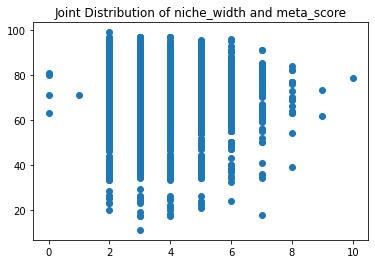

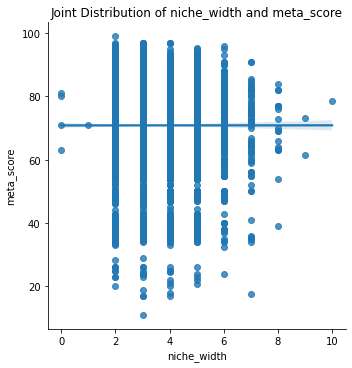

In [123]:
#Korrelation Meta_Score:
x="niche_width"
y="meta_score"

    #Only the scatterplot:
plt.scatter(x = metacrit_data[x], y = metacrit_data[y])       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/scatterplot_"+x+"_"+y+ ".jpg")    #Saves the picture at the end


    #Scatterplot and correlation line
sns.lmplot(x, y, data=metacrit_data)                       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/correlation_"+x+"_"+y+ ".jpg")    #Saves the picture at the end

print(metacrit_data[[x,y]].dropna().corr())

c:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


             niche_width  user_score
niche_width     1.000000   -0.049028
user_score     -0.049028    1.000000


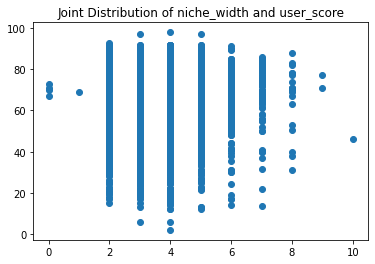

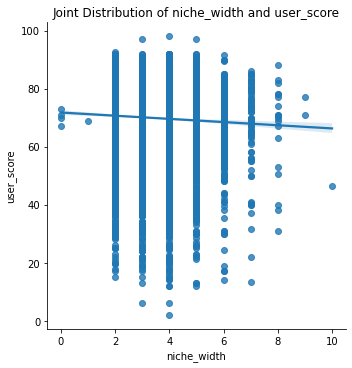

In [124]:
#Korrelation User_Score:
x="niche_width"
y="user_score"

    #Only the scatterplot:
plt.scatter(x = metacrit_data[x], y = metacrit_data[y])       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/scatterplot_"+x+"_"+y+ ".jpg")    #Saves the picture at the end


    #Scatterplot and correlation line
sns.lmplot(x, y, data=metacrit_data)                       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/correlation_"+x+"_"+y+ ".jpg")    #Saves the picture at the end

print(metacrit_data[[x,y]].dropna().corr())

In [142]:
metacrit_data[["meta_score","user_score","niche_width"]].to_stata('stata_data.dta')

In [153]:
%stata use stata_data

#Korrelation
%stata corr niche_width user_score 
%stata ttest niche_width, by(user_score)



(obs=8,831)

             | niche_~h user_s~e
-------------+------------------
 niche_width |   1.0000
  user_score |  -0.0490   1.0000



Exception in thread Stata:
Traceback (most recent call last):
  File "c:\Users\Marek\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Program Files/Stata17/utilities\pystata\core\stout.py", line 169, in run
    raise SystemError(output)
SystemError: more than 2 groups found, only 2 allowed
r(420);



In [159]:
metacrit_data

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,publisher,players,release_date,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative,niche_width
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",/game/nintendo-64/the-legend-of-zelda-ocarina-...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,['Action Adventure','Fantasy'],0,0,0,0,0,0,0,0,Nintendo,1 Player,"Nov 23, 1998",/game/nintendo-64/the-legend-of-zelda-ocarina-...,22.0,0.0,0.0,918.0,42.0,37.0,2
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,/game/wii/super-mario-galaxy,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"Nov 12, 2007",/game/wii/super-mario-galaxy,73.0,0.0,0.0,608.0,46.0,26.0,3
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",/game/wii/super-mario-galaxy-2,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"May 23, 2010",/game/wii/super-mario-galaxy-2,87.0,0.0,0.0,294.0,16.0,15.0,3
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,/game/gamecube/metroid-prime,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,['Action','Shooter','First-Person','Sci-Fi'],0,0,0,0,0,0,Nintendo,1 Player,"Nov 17, 2002",/game/gamecube/metroid-prime,70.0,0.0,0.0,267.0,20.0,9.0,4
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,/game/switch/super-mario-odyssey,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"Oct 27, 2017",/game/switch/super-mario-odyssey,113.0,0.0,0.0,1068.0,65.0,38.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,['Action','Shooter','Third-Person','Modern'],0,0,0,0,0,0,Namco,1 Player,"Oct 28, 2003",/game/xbox/killswitch,16.0,10.0,0.0,5.0,1.0,1.0,4
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,['Driving','Racing','Arcade','Automobile'],0,0,0,0,0,0,Deep Silver,No Online Multiplayer,"Nov 30, 2010",/game/pc/naild,5.0,8.0,0.0,4.0,2.0,1.0,4
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,/game/xbox-one/ooo-ascension,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,['Action','General','Arcade'],0,0,0,0,0,0,0,Extra Mile Studios,Online Multiplayer,"May 25, 2018",/game/xbox-one/ooo-ascension,4.0,4.0,0.0,2.0,1.0,0.0,3
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",0,E,['Miscellaneous','General'],0,0,0,0,0,0,0,0,THQ,0,"Nov 14, 2010",/game/wii/udraw-studio,2.0,7.0,0.0,1.0,0.0,0.0,2


"Test Area"

In [168]:
metacrit_data.groupby(["developer"])["meta_score"].mean()

developer
0                       69.900000
101%                    60.500000
10tacle Studios         37.000000
10tons                  74.625000
10tons Entertainment    66.056667
                          ...    
tinyBuild               61.167500
tobyfox                 92.330000
winterworks             64.000000
xii games               76.000000
zSlide                  55.000000
Name: meta_score, Length: 2928, dtype: float64

In [164]:
group_dev["meta_score"].mean().sort_values()

developer
Art Co., Ltd.              11.00
Gravity Corporation        17.00
Pure FPS                   19.00
Hammerpoint Interactive    20.00
Versus Evil                21.00
                           ...  
tobyfox                    92.33
MPS Labs                   94.00
NexTech                    94.00
Monstars Inc.              95.00
HuneX                      97.00
Name: meta_score, Length: 2928, dtype: float64

In [221]:
#dev_list=
metacrit_data["developer"].value_counts()



Capcom            150
Nintendo          130
Telltale Games    104
Konami             86
Square Enix        76
                 ... 
Starcolt            1
Hot Lava Games      1
V1 Interactive      1
BeeWorks            1
Kenny Creanor       1
Name: developer, Length: 2928, dtype: int64

In [211]:
dev_list=dev_list.replace(False, np.nan)
dev_list=dev_list.dropna()

In [219]:
devlist=pd.DataFrame(dev_list)
devlist

,developer
Capcom,True
Nintendo,True
Telltale Games,True
Konami,True
Square Enix,True
EA Sports,True
Ubisoft,True
Ubisoft Montreal,True
EA Canada,True
Sega,True


In [218]:
metacrit_data["developer"].unique()

array(['Nintendo', 'Nintendo EAD Tokyo ', 'Retro Studios', ...,
       'PuzzleKings', 'Kiloo', 'Kenny Creanor'], dtype=object)

# Year

In [225]:
metacrit_data

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,publisher,players,release_date,link,critic_positive,critic_neutral,critic_negative,user_positive,user_neutral,user_negative,niche_width
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",/game/nintendo-64/the-legend-of-zelda-ocarina-...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,['Action Adventure','Fantasy'],0,0,0,0,0,0,0,0,Nintendo,1 Player,"Nov 23, 1998",/game/nintendo-64/the-legend-of-zelda-ocarina-...,22.0,0.0,0.0,918.0,42.0,37.0,2
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,/game/wii/super-mario-galaxy,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"Nov 12, 2007",/game/wii/super-mario-galaxy,73.0,0.0,0.0,608.0,46.0,26.0,3
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",/game/wii/super-mario-galaxy-2,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"May 23, 2010",/game/wii/super-mario-galaxy-2,87.0,0.0,0.0,294.0,16.0,15.0,3
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,/game/gamecube/metroid-prime,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,['Action','Shooter','First-Person','Sci-Fi'],0,0,0,0,0,0,Nintendo,1 Player,"Nov 17, 2002",/game/gamecube/metroid-prime,70.0,0.0,0.0,267.0,20.0,9.0,4
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,/game/switch/super-mario-odyssey,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,['Action','Platformer','3D'],0,0,0,0,0,0,0,Nintendo,No Online Multiplayer,"Oct 27, 2017",/game/switch/super-mario-odyssey,113.0,0.0,0.0,1068.0,65.0,38.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,['Action','Shooter','Third-Person','Modern'],0,0,0,0,0,0,Namco,1 Player,"Oct 28, 2003",/game/xbox/killswitch,16.0,10.0,0.0,5.0,1.0,1.0,4
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,['Driving','Racing','Arcade','Automobile'],0,0,0,0,0,0,Deep Silver,No Online Multiplayer,"Nov 30, 2010",/game/pc/naild,5.0,8.0,0.0,4.0,2.0,1.0,4
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,/game/xbox-one/ooo-ascension,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,['Action','General','Arcade'],0,0,0,0,0,0,0,Extra Mile Studios,Online Multiplayer,"May 25, 2018",/game/xbox-one/ooo-ascension,4.0,4.0,0.0,2.0,1.0,0.0,3
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",0,E,['Miscellaneous','General'],0,0,0,0,0,0,0,0,THQ,0,"Nov 14, 2010",/game/wii/udraw-studio,2.0,7.0,0.0,1.0,0.0,0.0,2


In [226]:
metacrit_data[["date","year"]] = metacrit_data["release_date"].str.split(",", expand=True) 

In [231]:
metacrit_data.drop(columns=["date"], inplace=True)

In [245]:
metacrit_data.dtypes

game_name           object
meta_score         float64
user_score         float64
platform            object
description         object
url                 object
developer           object
genre               object
type                object
rating              object
genre1              object
genre2              object
genre3              object
genre4              object
genre5              object
genre6              object
genre7              object
genre8              object
genre9              object
genre10             object
publisher           object
players             object
release_date        object
link                object
critic_positive    float64
critic_neutral     float64
critic_negative    float64
user_positive      float64
user_neutral       float64
user_negative      float64
niche_width          int64
year               float64
dtype: object

In [243]:
metacrit_data["year"]= pd.to_numeric(metacrit_data["year"])

c:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                year  user_score
year        1.000000   -0.215807
user_score -0.215807    1.000000


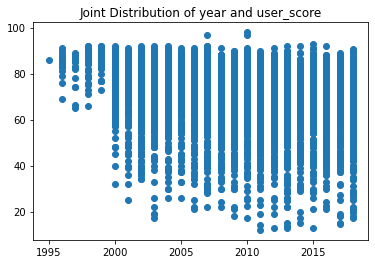

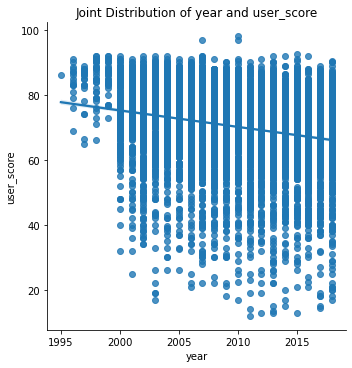

In [244]:
#Korrelation User_Score:
x="year"
y="user_score"

    #Only the scatterplot:
plt.scatter(x = metacrit_data[x], y = metacrit_data[y])       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/scatterplot_"+x+"_"+y+ ".jpg")    #Saves the picture at the end


    #Scatterplot and correlation line
sns.lmplot(x, y, data=metacrit_data)                       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/correlation_"+x+"_"+y+ ".jpg")    #Saves the picture at the end

print(metacrit_data[[x,y]].dropna().corr())